# Cross lingual similarity 
The measure is defined to quatnify the typological similarity across languages. It's based on typological (language-specific) features annotated in [WALS](https://wals.info/). 

The code was initally used for the work: ["Examining Cross-lingual Contextual Embeddings with Orthogonal Structural Probes'"](https://aclanthology.org/2021.emnlp-main.376.pdf)

Author: Tomasz Limisiewicz

## Imports and plot parameters

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib
from matplotlib import rc

import pandas as pd
import numpy as np

from scipy.spatial.distance import pdist, squareform

sns.set(style='white')

## Download WALS Data

Used the data from https://github.com/cldf-datasets/cldf-datasets @commit 12a1b516fdf2010c9856ac77ce873b44475ac52e

Access: 21.03.2022


In [2]:
!wget -O data/WALS/languages.csv https://raw.githubusercontent.com/cldf-datasets/wals/master/cldf/languages.csv
!wget -O data/WALS/values.csv https://raw.githubusercontent.com/cldf-datasets/wals/master/cldf/values.csv

!wget -O data/WALS/parameters.csv https://raw.githubusercontent.com/cldf-datasets/wals/master/cldf/parameters.csv
!wget -O data/WALS/chapters.csv https://raw.githubusercontent.com/cldf-datasets/wals/master/cldf/chapters.csv
!wget -O data/WALS/areas.csv https://raw.githubusercontent.com/cldf-datasets/wals/master/cldf/areas.csv    based

--2022-03-21 16:15:58--  https://raw.githubusercontent.com/cldf-datasets/wals/master/cldf/languages.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391679 (382K) [text/plain]
Saving to: ‘data/WALS/languages.csv’

data/WALS/languages 100%[===================>] 382.50K  1.84MB/s    in 0.2s    

2022-03-21 16:15:59 (1.84 MB/s) - ‘data/WALS/languages.csv’ saved [391679/391679]

--2022-03-21 16:15:59--  https://raw.githubusercontent.com/cldf-datasets/wals/master/cldf/values.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 464186

Obtaining feature -> area mapping

In [3]:
# feature 2 area mapping
parameters_df = pd.read_csv('data/WALS/parameters.csv', index_col='ID')
chapters_df = pd.read_csv('data/WALS/chapters.csv', index_col='Number')
areas_df = pd.read_csv('data/WALS/areas.csv', index_col='ID')

parameters_areas_df = parameters_df.join(chapters_df, how='left', on="Chapter_ID", rsuffix="_chapter")\
             .join(areas_df, how='left', on="Area_ID", rsuffix="_area")[["Name", "Name_area"]]

parameters_areas_df.columns = ["Name", "Area"]

Obtaining cross table with languages and featues:

In [4]:
# languages values pivot
languages_df =  pd.read_csv('data/WALS/languages.csv', index_col='ID')
values_df = pd.read_csv('data/WALS/values.csv', index_col='ID')

languages_df.index = languages_df.index.fillna('nan')
values_df.Language_ID = values_df.Language_ID.fillna('nan')


values_languages_df = values_df.join(languages_df, how='right', on='Language_ID', rsuffix='_language')[['Language_ID','Parameter_ID', 'Value']]


languages_x_features_df = values_languages_df.pivot(index='Language_ID', columns='Parameter_ID', values='Value').drop(labels=np.nan, axis=1)

languages_x_features_df

Parameter_ID,100A,101A,102A,103A,104A,105A,106A,107A,108A,108B,...,91A,92A,93A,94A,95A,96A,97A,98A,99A,9A
Language_ID,,,,,,,,,,,,,,,,,,,,,
aab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
aar,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN
aba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
abb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abi,2.0,NaN,5.0,3.0,2.0,NaN,NaN,2.0,NaN,NaN,...,1.0,NaN,1.0,1.0,4.0,4.0,5.0,1.0,1.0,3.0
abk,3.0,2.0,5.0,2.0,3.0,1.0,2.0,2.0,3.0,4.0,...,1.0,6.0,2.0,4.0,1.0,1.0,2.0,1.0,1.0,3.0


Watch out: 
1. at the time, there is now features annontated for: Fiote `fio` and Jiarong `jia` 
2. Nandi `nan` is treated as `NaN` value, fixed above

## Process WALS Data

Selecting the languages used in the analysis.


In [5]:
languages = ['eng', 'spa', 'slo', 'ind', 'mnd', 'fin', 'arg', 'fre', 'bsq']

wals2iso = {'eng': 'EN', 'spa': 'ES', 'slo': 'SL', 'ind': 'ID', 'mnd': 'ZH', 'fin': 'FI', 'arg': 'AR', 'fre': 'FR', 'bsq': 'EU'}

Selecting the syntactinc and lexical features (specified by the areas).

In [6]:

dep_areas = {"Nominal Syntax", "Word Order", "Simple Clauses", "Complex Sentences"}
lex_areas = {"Nominal Categories", "Verbal Categories", "Lexicon"}


# *_feaures stores list of selected features 
dep_features = parameters_areas_df[parameters_areas_df.Area.isin(dep_areas)].index
lex_features = parameters_areas_df[parameters_areas_df.Area.isin(lex_areas)].index

all_features = parameters_areas_df.index

languages_dep_features = languages_x_features_df[dep_features].loc[languages]
languages_lex_features = languages_x_features_df[lex_features].loc[languages]


A few syntactic features:

In [7]:
parameters_areas_df.loc[dep_features].head(15)

,Name,Area
ID,,
58A,Obligatory Possessive Inflection,Nominal Syntax
58B,Number of Possessive Nouns,Nominal Syntax
59A,Possessive Classification,Nominal Syntax
60A,"Genitives, Adjectives and Relative Clauses",Nominal Syntax
61A,Adjectives without Nouns,Nominal Syntax
62A,Action Nominal Constructions,Nominal Syntax
63A,Noun Phrase Conjunction,Nominal Syntax
64A,Nominal and Verbal Conjunction,Nominal Syntax
81A,"Order of Subject, Object and Verb",Word Order


A few lexical features:

In [8]:
parameters_areas_df.loc[lex_features].head(15)

,Name,Area
ID,,
30A,Number of Genders,Nominal Categories
31A,Sex-based and Non-sex-based Gender Systems,Nominal Categories
32A,Systems of Gender Assignment,Nominal Categories
33A,Coding of Nominal Plurality,Nominal Categories
34A,Occurrence of Nominal Plurality,Nominal Categories
35A,Plurality in Independent Personal Pronouns,Nominal Categories
36A,The Associative Plural,Nominal Categories
37A,Definite Articles,Nominal Categories
38A,Indefinite Articles,Nominal Categories


## Compute distances and coverage

Hamming similarity (a.k.a. string similarity) between rows in langugage x feature cross-table.

A features is comparable for pair of languages <=> it is non-NaN for both of them. 

In [9]:
def hamming_similarity(rowX, rowY):
    comparable_feats = 0
    same_feats = 0
    for fX, fY in zip(rowX, rowY):
        if not pd.isnull(fX) and not pd.isnull(fY):
            comparable_feats += 1
            if fX == fY:
                same_feats += 1
                
    if not comparable_feats:
        return 0.
    else:
        return same_feats / comparable_feats
    
def comparable_features(rowX, rowY):
    comparable_feats = 0
    for fX, fY in zip(rowX, rowY):
        if not pd.isnull(fX) and not pd.isnull(fY):
            comparable_feats += 1
    
    return comparable_feats
                


### Coverage

Number of comparable (non-NaN for both) features for pairs of languges.

In [10]:
comparable_dep_vector = pdist(languages_dep_features, metric=comparable_features)

comparable_dep_table = pd.DataFrame(
    squareform(comparable_dep_vector),
    columns = languages_dep_features.index,
    index = languages_dep_features.index
)

comparable_lex_vector = pdist(languages_lex_features, metric=comparable_features)

comparable_lex_table = pd.DataFrame(
    squareform(comparable_lex_vector),
    columns = languages_lex_features.index,
    index = languages_lex_features.index
)


In [11]:
comparable_lex_table

Language_ID,eng,spa,slo,ind,mnd,fin,arg,fre,bsq
Language_ID,,,,,,,,,
eng,0.0,54.0,14.0,53.0,55.0,53.0,21.0,57.0,53.0
spa,54.0,0.0,14.0,50.0,52.0,50.0,20.0,54.0,50.0
slo,14.0,14.0,0.0,14.0,14.0,14.0,8.0,14.0,14.0
ind,53.0,50.0,14.0,0.0,51.0,53.0,21.0,53.0,53.0
mnd,55.0,52.0,14.0,51.0,0.0,51.0,19.0,55.0,51.0
fin,53.0,50.0,14.0,53.0,51.0,0.0,21.0,53.0,53.0
arg,21.0,20.0,8.0,21.0,19.0,21.0,0.0,21.0,21.0
fre,57.0,54.0,14.0,53.0,55.0,53.0,21.0,0.0,53.0
bsq,53.0,50.0,14.0,53.0,51.0,53.0,21.0,53.0,0.0


In [12]:
comparable_dep_table 

Language_ID,eng,spa,slo,ind,mnd,fin,arg,fre,bsq
Language_ID,,,,,,,,,
eng,0.0,69.0,24.0,69.0,67.0,70.0,37.0,68.0,63.0
spa,69.0,0.0,24.0,68.0,66.0,69.0,37.0,67.0,62.0
slo,24.0,24.0,0.0,24.0,24.0,24.0,24.0,24.0,19.0
ind,69.0,68.0,24.0,0.0,66.0,69.0,36.0,67.0,62.0
mnd,67.0,66.0,24.0,66.0,0.0,67.0,35.0,66.0,62.0
fin,70.0,69.0,24.0,69.0,67.0,0.0,37.0,68.0,63.0
arg,37.0,37.0,24.0,36.0,35.0,37.0,0.0,37.0,31.0
fre,68.0,67.0,24.0,67.0,66.0,68.0,37.0,0.0,61.0
bsq,63.0,62.0,19.0,62.0,62.0,63.0,31.0,61.0,0.0


### Similarity

In [13]:
pairwise_dep_vector = pdist(languages_dep_features, metric=hamming_similarity)

pairwise_dep_table = pd.DataFrame(
    squareform(pairwise_dep_vector),
    columns = languages_dep_features.index,
    index = languages_dep_features.index
)

pairwise_lex_vector = pdist(languages_lex_features, metric=hamming_similarity)

pairwise_lex_table = pd.DataFrame(
    squareform(pairwise_lex_vector),
    columns = languages_lex_features.index,
    index = languages_lex_features.index
)

np.fill_diagonal(pairwise_dep_table.values, 1.0)
np.fill_diagonal(pairwise_lex_table.values, 1.0)

In [14]:
pairwise_dep_table

Language_ID,eng,spa,slo,ind,mnd,fin,arg,fre,bsq
Language_ID,,,,,,,,,
eng,1.000000,0.710145,0.916667,0.594203,0.552239,0.742857,0.756757,0.691176,0.460317
spa,0.710145,1.000000,0.791667,0.588235,0.439394,0.652174,0.837838,0.761194,0.516129
slo,0.916667,0.791667,1.000000,0.750000,0.833333,0.791667,0.791667,0.541667,0.526316
ind,0.594203,0.588235,0.750000,1.000000,0.621212,0.507246,0.722222,0.537313,0.370968
mnd,0.552239,0.439394,0.833333,0.621212,1.000000,0.522388,0.514286,0.363636,0.419355
fin,0.742857,0.652174,0.791667,0.507246,0.522388,1.000000,0.675676,0.647059,0.507937
arg,0.756757,0.837838,0.791667,0.722222,0.514286,0.675676,1.000000,0.621622,0.451613
fre,0.691176,0.761194,0.541667,0.537313,0.363636,0.647059,0.621622,1.000000,0.426230
bsq,0.460317,0.516129,0.526316,0.370968,0.419355,0.507937,0.451613,0.426230,1.000000


In [15]:
pairwise_lex_table

Language_ID,eng,spa,slo,ind,mnd,fin,arg,fre,bsq
Language_ID,,,,,,,,,
eng,1.000000,0.648148,0.642857,0.471698,0.545455,0.528302,0.285714,0.631579,0.415094
spa,0.648148,1.000000,0.642857,0.360000,0.500000,0.580000,0.350000,0.759259,0.460000
slo,0.642857,0.642857,1.000000,0.357143,0.571429,0.571429,0.250000,0.714286,0.571429
ind,0.471698,0.360000,0.357143,1.000000,0.666667,0.433962,0.238095,0.301887,0.358491
mnd,0.545455,0.500000,0.571429,0.666667,1.000000,0.490196,0.368421,0.454545,0.431373
fin,0.528302,0.580000,0.571429,0.433962,0.490196,1.000000,0.428571,0.490566,0.452830
arg,0.285714,0.350000,0.250000,0.238095,0.368421,0.428571,1.000000,0.333333,0.238095
fre,0.631579,0.759259,0.714286,0.301887,0.454545,0.490566,0.333333,1.000000,0.471698
bsq,0.415094,0.460000,0.571429,0.358491,0.431373,0.452830,0.238095,0.471698,1.000000


### Visualising similarity

The results in two prevous cells presented in a heatmap

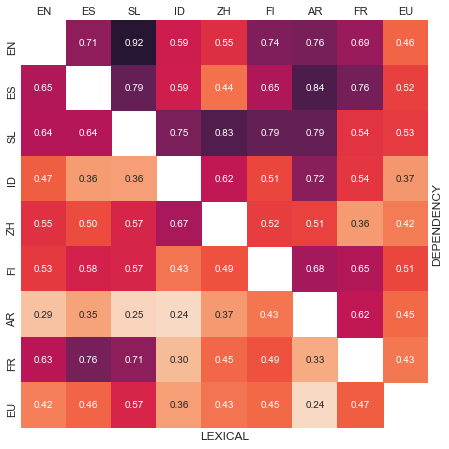

In [16]:
plt.figure(figsize=(7.5,7.5))


matrix_triu = np.triu(pairwise_lex_table)
sns.heatmap(pairwise_lex_table, annot = True, mask=matrix_triu, fmt='.2f', square=True, cbar=False, cmap="rocket_r", vmin=0.2, vmax=1)

matrix_tril = np.tril(pairwise_dep_table)
g = sns.heatmap(pairwise_dep_table, annot = True, mask=matrix_tril, fmt='.2f', square=True, cbar=False, cmap="rocket_r", vmin=0.2, vmax=1)

g.set_xlabel('LEXICAL')
g.xaxis.set_label_position("bottom")
g.set_xticklabels(['EN', 'ES', 'SL', 'ID', 'ZH', 'FI', 'AR', 'FR', 'EU'])
g.xaxis.tick_top()

g.set_ylabel('DEPENDENCY')
g.yaxis.set_label_position("right")
g.set_yticklabels(['EN', 'ES', 'SL', 'ID', 'ZH', 'FI', 'AR', 'FR', 'EU'])

g.tick_params(axis='both', which='both', length=0)

